In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import graphviz 
import seaborn as sns

iris = load_iris()

In [2]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
train_X , test_X , train_y , test_y = train_test_split(iris.data , iris.target , test_size = 0.3)

In [6]:
clf  = DecisionTreeClassifier()

In [7]:
clf.fit(train_X , train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
clf.score(test_X , test_y)

0.9333333333333333

In [9]:
z = clf.predict(test_X)
print(z)

[2 0 0 1 2 2 2 1 2 1 2 1 1 2 2 2 1 0 1 0 0 1 1 0 1 1 0 1 0 0 2 0 0 2 0 2 0
 1 2 1 0 2 0 0 0]


In [10]:
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 

graph = graphviz.Source(dot_data) 
graph.render("iris" , view   = True) 

'iris.pdf'

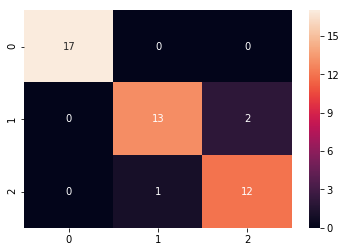

In [11]:
sns.heatmap(confusion_matrix(test_y , z) , annot = True , fmt = '.5g')

In [14]:
h = .02 # step size in the mesh

# create a mesh to plot in
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	            np.arange(y_min, y_max, h))

print(x_min); print(x_max)
print(y_min); print(y_max)

print(xx); print(yy)

# title for the plots
titles = ['SVC with linear kernel',
	  'LinearSVC (linear kernel)',
	  'SVC with RBF kernel',
	  'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()

3.4000000000000004
8.9
1.0
5.2
[[3.4  3.42 3.44 ... 8.84 8.86 8.88]
 [3.4  3.42 3.44 ... 8.84 8.86 8.88]
 [3.4  3.42 3.44 ... 8.84 8.86 8.88]
 ...
 [3.4  3.42 3.44 ... 8.84 8.86 8.88]
 [3.4  3.42 3.44 ... 8.84 8.86 8.88]
 [3.4  3.42 3.44 ... 8.84 8.86 8.88]]
[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 [1.04 1.04 1.04 ... 1.04 1.04 1.04]
 ...
 [5.14 5.14 5.14 ... 5.14 5.14 5.14]
 [5.16 5.16 5.16 ... 5.16 5.16 5.16]
 [5.18 5.18 5.18 ... 5.18 5.18 5.18]]


NameError: name 'svc' is not defined